In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('bollywood-1.csv')

In [10]:
#1
total_entries = len(df)
print (total_entries)

149


In [11]:
#2
print (df.ReleaseTime.value_counts())

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64


In [12]:
#3
FS_entries = df[(df['ReleaseTime'] == 'FS')]
print (FS_entries.groupby('Genre').size().idxmax())

 Drama 


In [13]:
#4
pd.crosstab(df.ReleaseTime, df.Genre)

Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [14]:
#5
df['Year'] = ("20" + df.loc[:,"Release Date"].str[-2:])
df.Year.value_counts().idxmax()

'2014'

In [15]:
#6
data1 = df[(df['Budget']>30)]
data1.loc[:,'Release Date'].str[-6:-3].value_counts().idxmax()

'Aug'

In [16]:
#7
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/(df.Budget)
df.sort_values(by="ROI").head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,ROI
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1,2013,-0.995000
15,16,18-Jan-13,Bandook,N,Action,4,0.09,28391,8,14,2013,-0.977500
53,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112,2013,-0.976000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013,-0.950000
49,50,2-May-14,Kya Dilli Kya Lahore,HS,Drama,7,0.50,492344,2018,64,2014,-0.928571
121,122,8-Nov-13,Satya 2,FS,Thriller,15,1.10,110315,89,26,2013,-0.926667
67,68,2-May-14,Purani Jeans,HS,Romance,10,1.10,1537063,822,229,2014,-0.890000
103,104,25-Apr-14,Samrat and Co.,N,Thriller,18,2.00,371133,532,180,2014,-0.888889
30,31,7-Feb-14,Heartless,N,Thriller,12,1.50,4823892,5797,227,2014,-0.875000
102,103,25-Apr-14,Kaanchi,N,Drama,31,4.00,2360968,2807,595,2014,-0.870968


In [17]:
#8
df_N = df[(df['ReleaseTime']== 'N')]
df_HS = df[(df['ReleaseTime']== 'HS')]
df_FS = df[(df['ReleaseTime']== 'FS')]
df_LW = df[(df['ReleaseTime']== 'LW')]
print("Average ROI for N is", df_N['ROI'].mean())
print("Average ROI for HS is", df_HS['ROI'].mean())
print("Average ROI for FS is", df_FS['ROI'].mean())
print("Average ROI for LW is", df_LW['ROI'].mean())
#from the values its clear that movies released during long weekends and Festive season have more ROI

Average ROI for N is 0.6577216305350877
Average ROI for HS is 0.8508667840873724
Average ROI for FS is 0.9738532013595953
Average ROI for LW is 1.1272053098737973


In [18]:
#9
x = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
if (x>0): 
    print(x)
    print("the correlation is positive")
else:
    print(x)
    print("the correlation is negetive")

0.6825165877731297
the correlation is positive


<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

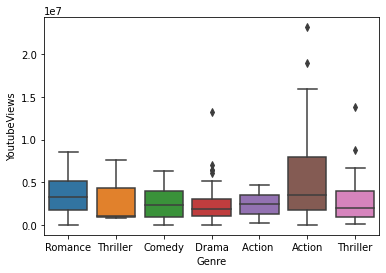

In [19]:
#10'
sns.boxplot(x='Genre', y='YoutubeViews', data=df)

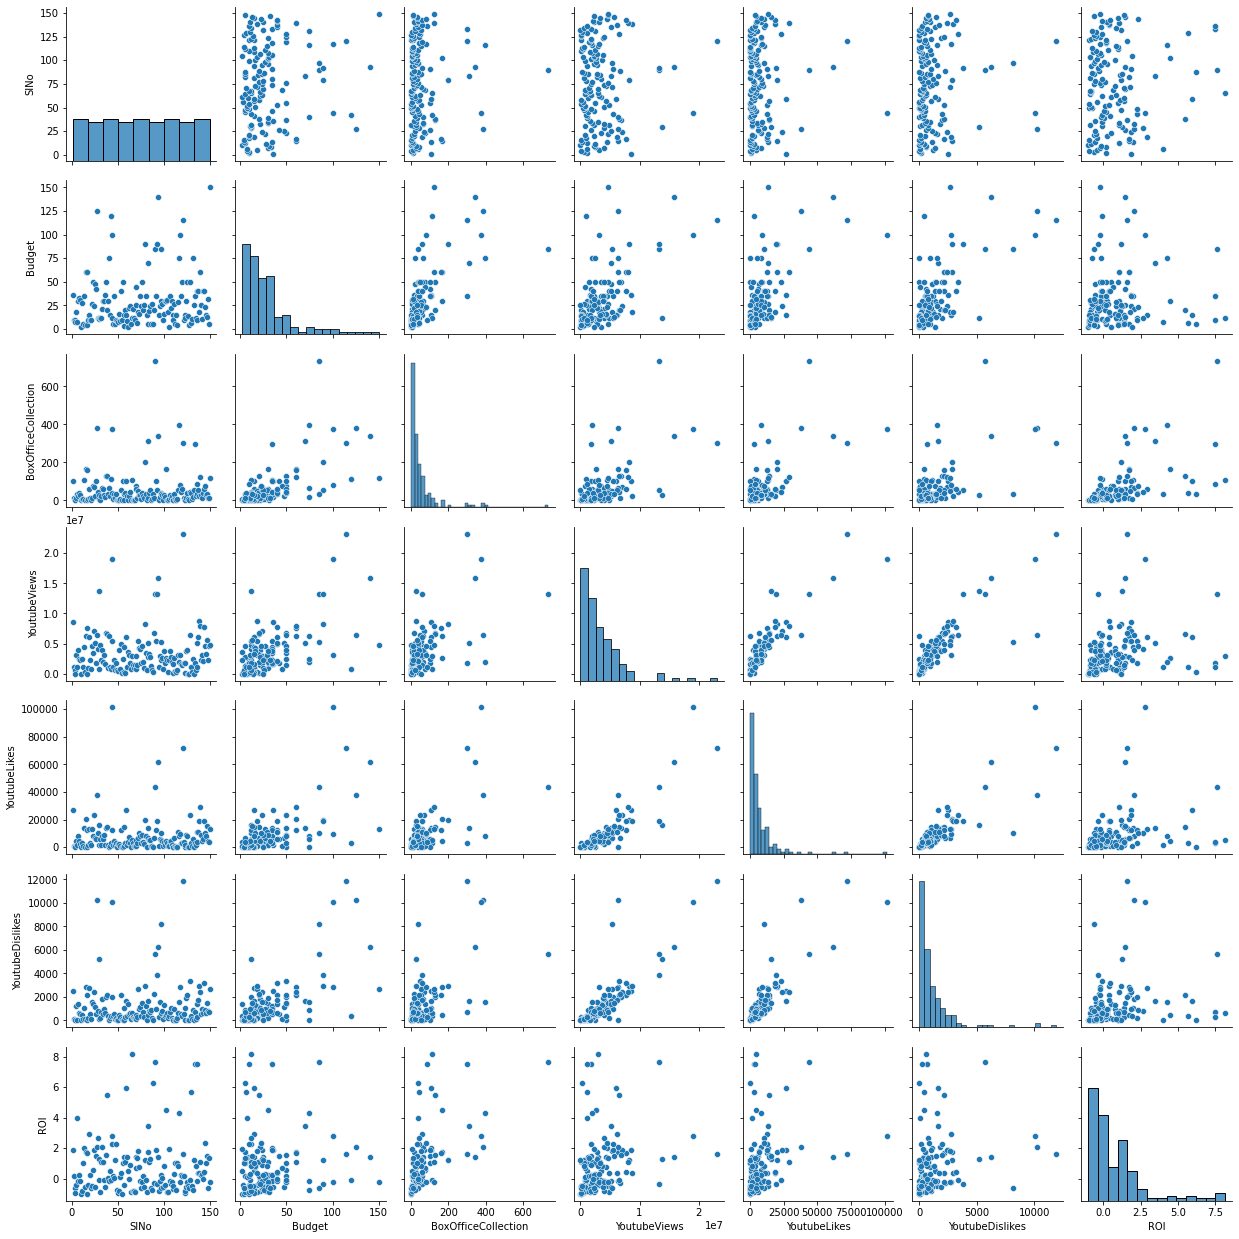

In [20]:
#11
sns.pairplot(df)

<BarContainer object of 7 artists>

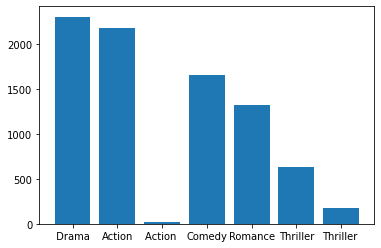

In [21]:
#12
c = df.groupby('Genre')
d = c['BoxOfficeCollection'].sum().reset_index(name='Total')
a = d['Genre']
b = d['Total']
plt.bar(a,b)


<AxesSubplot:>

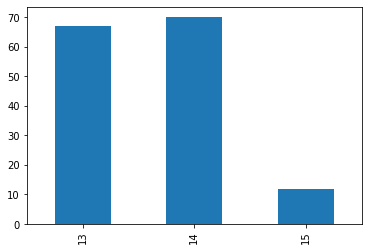

In [24]:
#13
df.loc[:,"Release Date"].str[-2:].value_counts().sort_index().plot(kind = 'bar')

<BarContainer object of 7 artists>

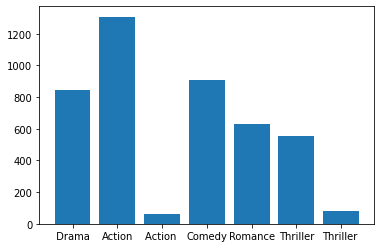

In [23]:
#14
d = c['Budget'].sum().reset_index(name='Total')
x = d['Genre']
y = d['Total']
plt.bar(x,y)


<AxesSubplot:xlabel='Year'>

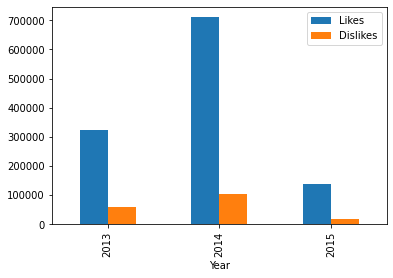

In [31]:
#15
x = pd.DataFrame()
x['Year'] = "2013","2014","2015"
x['Likes'] = df[df.loc[:,"Release Date"].str[-2:]=='13'].YoutubeLikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='14'].YoutubeLikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='15'].YoutubeLikes.sum()
x['Dislikes'] = df[df.loc[:,"Release Date"].str[-2:]=='13'].YoutubeDislikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='14'].YoutubeDislikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='15'].YoutubeDislikes.sum()
x.plot(x="Year", y=["Likes", "Dislikes"], kind = "bar")
